<a href="https://colab.research.google.com/github/Haniya16/rhombixtechnologies_tasks/blob/main/Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Reconition Using Machine Learning Project

Import Libraries

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

Load and Process the Data.
Here we use CIFAR10 data set of tensorflow

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


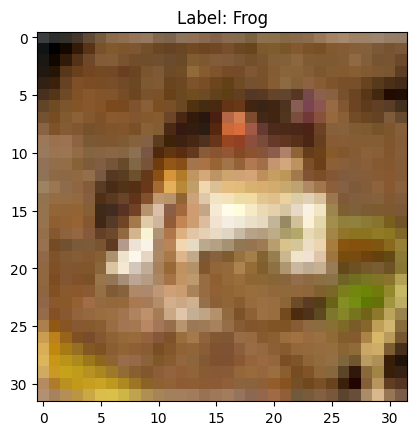

In [ ]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Display a sample image and its label
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.imshow(X_train[0])
plt.title(f"Label: {class_names[np.argmax(y_train[0])]}")
plt.show()

Buid the Neural Network CNN Model

In [ ]:
from tensorflow.keras.layers import Input

# Build the CNN model
model = Sequential([
    Input(shape=(32, 32, 3)),  # Define input shape explicitly
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 output classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

Train the Model after build CNN

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3202 - loss: 1.8440 - val_accuracy: 0.5236 - val_loss: 1.3405
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5129 - loss: 1.3579 - val_accuracy: 0.5913 - val_loss: 1.1357
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5699 - loss: 1.2099 - val_accuracy: 0.6394 - val_loss: 1.0397
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6085 - loss: 1.1067 - val_accuracy: 0.6604 - val_loss: 0.9883
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6320 - loss: 1.0481 - val_accuracy: 0.6733 - val_loss: 0.9413
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6584 - loss: 0.9865 - val_accuracy: 0.6866 - val_loss: 0.8959
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6711 - loss: 0.9402 - val_accuracy: 0.6896 - val_loss: 0.8905
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6840 - loss: 0.8985 - val_accuracy: 0

Evaluate the Model

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7062 - loss: 0.8431
Test Accuracy: 70.24%


Mount Google Drive

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/MyDrive')

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


Image testing

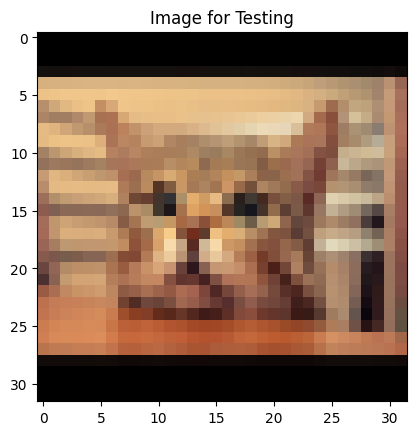

In [ ]:
from PIL import Image


# Path to the image in Google Drive
image_path = "/content/MyDrive/MyDrive/Colab Notebooks/image (1)/imageforproject.jpg"

# Load the image
img = Image.open(image_path)

# Preprocess the image
img = img.resize((32, 32))  # Resize to 32x32
img_array = np.array(img) / 255.0  # Normalize pixel values (0-1)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Display the image
plt.imshow(img)
plt.title("Image for Testing")
plt.show()


Prediction of the class of the process iage

In [ ]:
# Predict the class of the image
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]  # Replace 'class_names' with your label names
print(f"Predicted Label: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
Predicted Label: Cat
